In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

C:\Users\Vasu Sumeet Seth\AppData\Local\Temp\ipykernel_13108\569092195.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['Date'] = pd.to_datetime(self.data['Date'], errors='coerce')


Performing Temporal Analysis...


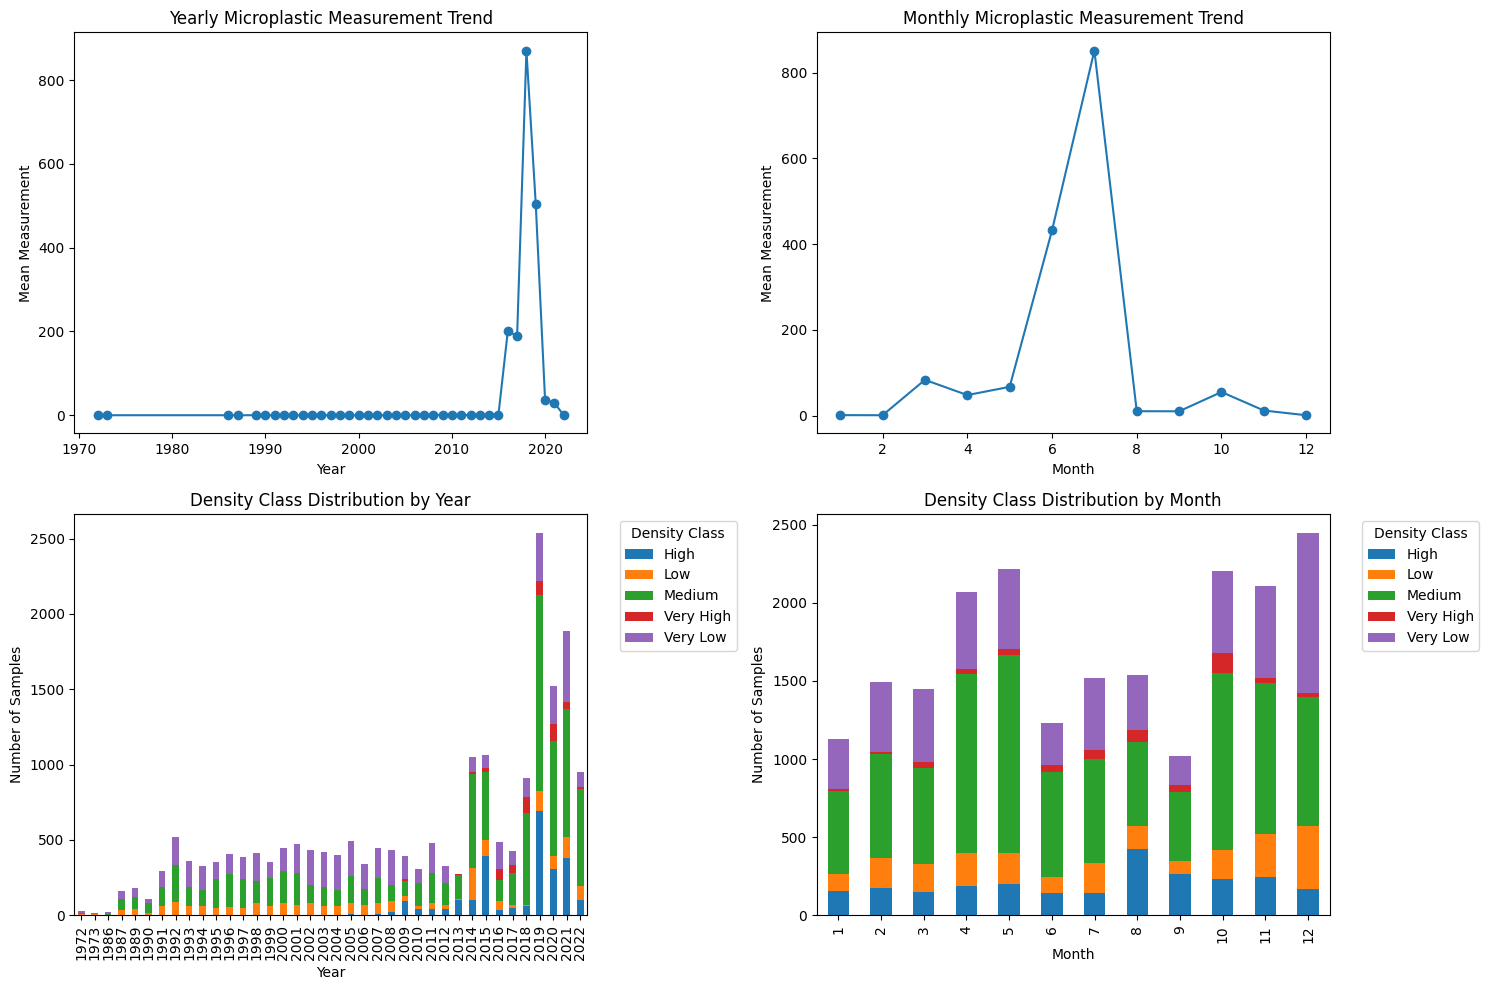


--- Models on Original Dataset ---


c:\Users\Vasu Sumeet Seth\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Model Results (Original Dataset):
Accuracy: 0.8927784577723378
Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.75      0.76       497
         Low       0.92      0.84      0.88       455
      Medium       0.90      0.93      0.91      1893
   Very High       0.87      0.75      0.80       112
    Very Low       0.94      0.93      0.94      1128

    accuracy                           0.89      4085
   macro avg       0.88      0.84      0.86      4085
weighted avg       0.89      0.89      0.89      4085


Gradient Boosting Model Results (Original Dataset):
Accuracy: 0.8812729498164015
Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.66      0.73       497
         Low       1.00      0.82      0.90       455
      Medium       0.84      0.96      0.89      1893
   Very High       0.89      0.74      0.81       112
    Very Low       0.95      0.89 

c:\Users\Vasu Sumeet Seth\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Random Forest Model Results (SMOTE):
Accuracy: 0.8834761321909425
Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.80      0.75       497
         Low       0.85      0.85      0.85       455
      Medium       0.92      0.89      0.91      1893
   Very High       0.78      0.78      0.78       112
    Very Low       0.94      0.92      0.93      1128

    accuracy                           0.88      4085
   macro avg       0.84      0.85      0.84      4085
weighted avg       0.89      0.88      0.88      4085


Gradient Boosting Model Results (SMOTE):
Accuracy: 0.8345165238678091
Classification Report:
              precision    recall  f1-score   support

        High       0.53      0.88      0.66       497
         Low       0.83      0.83      0.83       455
      Medium       0.94      0.79      0.86      1893
   Very High       0.66      0.80      0.73       112
    Very Low       0.94      0.90      0.92      1128

 

In [3]:




class MarineMicroplasticsAnalyzer:
    def __init__(self, data_path):
        """
        Initialize the marine microplastics analysis
        
        Parameters:
        -----------
        data_path : str
            Path to the marine microplastics dataset
        """
        # Load the dataset
        self.data = pd.read_csv(data_path)
        
        # Preprocessing preparation
        self.prepare_data()
    
    def prepare_data(self):
        """
        Prepare data for analysis
        """
        # Parse dates with fallback to dateutil
        self.data['Date'] = pd.to_datetime(self.data['Date'], errors='coerce')
        
        # Extract additional temporal features
        self.data['Year'] = self.data['Date'].dt.year
        self.data['Month'] = self.data['Date'].dt.month
        self.data['Day'] = self.data['Date'].dt.day
        
        # Handle missing values in key features
        categorical_features = ['Oceans', 'Regions', 'SubRegions', 'Sampling Method', 'Organization']
        for feature in categorical_features:
            self.data[feature] = self.data[feature].fillna('Unknown')
        
        self.data['Measurement'] = self.data['Measurement'].fillna(self.data['Measurement'].median())
        
        # Encode categorical variables
        self.label_encoders = {}
        for feature in categorical_features:
            le = LabelEncoder()
            self.data[f'{feature}_Encoded'] = le.fit_transform(self.data[feature].astype(str))
            self.label_encoders[feature] = le
        
        # Encode Density Class with predefined order
        self.density_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
        le_density = LabelEncoder()
        le_density.fit(self.density_order)
        
        # Map density classes to numeric labels
        self.data['Density_Class_Encoded'] = self.data['Density Class'].map(
            dict(zip(self.density_order, le_density.transform(self.density_order)))
        )
        
        self.density_label_encoder = le_density
    
    def temporal_analysis(self):
        
        yearly_analysis = self.data.groupby('Year').agg({
            'Measurement': ['mean', 'median', 'std'],
            'Density Class': lambda x: x.value_counts().index[0]
        }).reset_index()
        yearly_analysis.columns = ['Year', 'Mean_Measurement', 'Median_Measurement', 'Std_Measurement', 'Dominant_Density_Class']
        
      
        monthly_analysis = self.data.groupby('Month').agg({
            'Measurement': ['mean', 'median', 'std'],
            'Density Class': lambda x: x.value_counts().index[0]
        }).reset_index()
        monthly_analysis.columns = ['Month', 'Mean_Measurement', 'Median_Measurement', 'Std_Measurement', 'Dominant_Density_Class']
        
        
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 2, 1)
        plt.plot(yearly_analysis['Year'], yearly_analysis['Mean_Measurement'], marker='o')
        plt.title('Yearly Microplastic Measurement Trend')
        plt.xlabel('Year')
        plt.ylabel('Mean Measurement')
        
       
        plt.subplot(2, 2, 2)
        plt.plot(monthly_analysis['Month'], monthly_analysis['Mean_Measurement'], marker='o')
        plt.title('Monthly Microplastic Measurement Trend')
        plt.xlabel('Month')
        plt.ylabel('Mean Measurement')
        
     
        plt.subplot(2, 2, 3)
        yearly_density_dist = self.data.groupby(['Year', 'Density Class']).size().unstack(fill_value=0)
        yearly_density_dist.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Density Class Distribution by Year')
        plt.xlabel('Year')
        plt.ylabel('Number of Samples')
        plt.legend(title='Density Class', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        
        plt.subplot(2, 2, 4)
        monthly_density_dist = self.data.groupby(['Month', 'Density Class']).size().unstack(fill_value=0)
        monthly_density_dist.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Density Class Distribution by Month')
        plt.xlabel('Month')
        plt.ylabel('Number of Samples')
        plt.legend(title='Density Class', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()
        
        return yearly_analysis, monthly_analysis
    
    def prepare_features_and_target(self):
        
   
        features = [
            'Latitude', 'Longitude', 'x', 'y', 
            'Year', 'Month', 'Measurement',
            'Oceans_Encoded', 'Regions_Encoded', 
            'SubRegions_Encoded', 'Sampling Method_Encoded',
            'Organization_Encoded'
        ]
        
       
        X = self.data[features]
        
       
        y = self.data['Density_Class_Encoded']
        
        return X, y
    
    def train_models(self, X, y, test_size=0.2, random_state=42, use_smote=False):
        
  
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )
        
       
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
       
        if use_smote:
            smote = SMOTE(random_state=random_state)
            X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
        
     
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=random_state),
            'XGBoost': XGBClassifier(n_estimators=100, random_state=random_state, use_label_encoder=False, eval_metric='mlogloss')
        }
        
        
        results = {}
        
        
        for name, model in models.items():
            # Fit the model
            model.fit(X_train_scaled, y_train)
            
            # Predictions
            y_pred = model.predict(X_test_scaled)
            
            # Evaluate model
            results[name] = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Classification Report': classification_report(
                    y_test, 
                    y_pred, 
                    target_names=self.density_label_encoder.classes_
                )
            }
        
        return results

def main():
    # Specify the full path to your CSV file
    data_path = r'D:/Projects/Underwater Plastic Waste Detection/Code/Marine_Microplastics.csv'
    
    try:
        # Create analyzer
        analyzer = MarineMicroplasticsAnalyzer(data_path)
        
        # Perform Temporal Analysis
        print("Performing Temporal Analysis...")
        yearly_analysis, monthly_analysis = analyzer.temporal_analysis()
        
        # Prepare features and target
        X, y = analyzer.prepare_features_and_target()
        
        # Train models on original dataset
        print("\n--- Models on Original Dataset ---")
        original_results = analyzer.train_models(X, y, use_smote=False)
        for name, result in original_results.items():
            print(f"\n{name} Model Results (Original Dataset):")
            print(f"Accuracy: {result['Accuracy']}")
            print("Classification Report:")
            print(result['Classification Report'])
        
        # Train models with SMOTE
        print("\n--- Models with SMOTE ---")
        smote_results = analyzer.train_models(X, y, use_smote=True)
        for name, result in smote_results.items():
            print(f"\n{name} Model Results (SMOTE):")
            print(f"Accuracy: {result['Accuracy']}")
            print("Classification Report:")
            print(result['Classification Report'])
    
    except Exception as e:
        import traceback
        print(f"An error occurred: {e}")
        traceback.print_exc()

if __name__ == "__main__":
    main()